In [165]:
# Imported models
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

In [261]:
def inputs():

  # Loads data and returns independent variables
  # Converts 'No sea view' and 'Sea view' to 0s and 1s, respectively
  data = pd.read_csv('real_estate_price_size_year_view.csv')
  data['view'] = data['view'].apply(lambda x: 0 if x=='No sea view' else 1)
  size_year = data[['size', 'year', 'view']]
  return size_year

In [255]:
def targets():

  # Loads data and returns dependent variables
  data = pd.read_csv('real_estate_price_size_year_view.csv')
  price = data['price']
  return price

In [256]:
def feature_scaling(size_year):

  # Scales and transforms inputs
  scaler = StandardScaler()
  scaler.fit(size_year)
  size_year_scaled = scaler.transform(size_year)
  return size_year_scaled

In [257]:
def get_regression(size_year_scaled, price):

  # Trains the model
  reg = LinearRegression()
  regression = reg.fit(size_year_scaled, price)
  return reg

In [258]:
def scatter_plt(size_year_scaled, price, reg):
  
  # Predicts and plots predicted values against actual values.
  predicted_price = reg.predict(size_year_scaled)
  plt.scatter(price, predicted_price)

  # x-axis and y-axis labels
  plt.xlabel('Actual House Prices', size=13)
  plt.ylabel('Predictioned House Prices', size=13)

  # Displaying the title
  plt.title("Actual House Prices vs Predicted Prices", size=15)
  plt.show()

In [259]:
def r_squared(size_year_scaled, price, reg):

  # Calculates and prints R-squared
  variability = ((reg.score(size_year_scaled, price))*100).round(2)
  print(f'''\n  R-squared = {variability}%
  The model explains {variability}% of the variability of the data''')

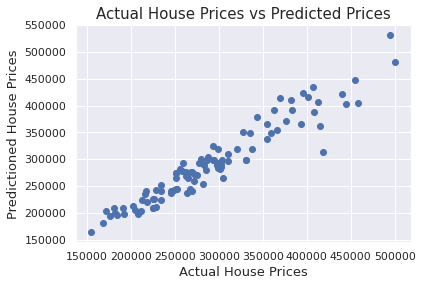


  R-squared = 91.29%
  The model explains 91.29% of the variability of the data


In [260]:
def main():

  # Executes the program by calling all the functions
  size_year = inputs()
  price = targets()
  size_year_scaled = feature_scaling(size_year)
  reg = get_regression(size_year_scaled, price)
  scatter_plt(size_year_scaled, price, reg)
  r_squared(size_year_scaled, price, reg)
  
main()